# Clustering
- analyse hyperparameters which can be set in a clustering  task

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, make_moons, make_blobs 
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

### Toy data sets
- First we want to visualize the three different toy datasets
- make_circles: a large circle containing a smaller circle in 2d

### Questions 
- The (0,1) lables for the datasets just remain unused??
- In AgglomerativeClustering: Is every single data point? Yes 
- Is there a way to automatically set a sensible range in scatter plot?
- Where there any other parameters besides metric which lead to improvement in average or complete?

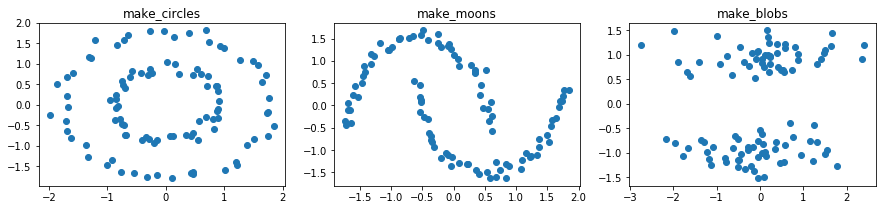

In [3]:
# make dataset for make_circles

# make_circles returs: 
# X: array of shape [n_samples, 2], The generated samples. --> coordinates of datapoints
# y: array of shape [n_samples]: The integer labels (0 or 1) for class membership of each sample.
# noise needs to be added so we don't just get equidistant points
# random_state: Pass an int for reproducible output across multiple function calls.

X1, y1 = make_circles(n_samples = 100, factor = 0.5, noise=.05)
X2, y2 = make_moons(n_samples = 100, noise=.05)
X3, y3 = make_blobs(n_samples = 100, centers=2, random_state=8)

# preprocessing data: normalize dataset for easier parameter selection
X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)
X3 = StandardScaler().fit_transform(X3)

samples = [X1, X2, X3] # access samples in loops

fig = plt.figure(figsize = (15,3))

ax1 = fig.add_subplot(131)
ax1.plot(X1[:,0], X1[:,1], 'o' )
ax1.set_title('make_circles')

ax2 = fig.add_subplot(132)
ax2.plot(X2[:,0], X2[:,1], 'o' )
ax2.set_title('make_moons')

ax3 = fig.add_subplot(133)
ax3.plot(X3[:,0], X3[:,1], 'o' )
ax3.set_title('make_blobs')

plt.show()

### Identify clusters with AgglomerativeClustering
We now want to use the AgglomerativeClustering Algorithm and see how it performs on these different types of clusters. 

-  AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy
- They begin with each object in a separate cluster. At each step, the two clusters that are most similar are joined into a single new cluster. Once fused, objects are never separated. 
- The eight methods that are available represent eight methods of defining the similarity between clusters
- Dendograms can be useful to determine the correct amount of clusters



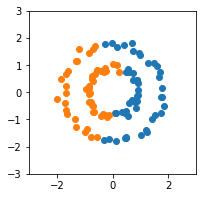

In [4]:
clustering = AgglomerativeClustering(n_clusters = 2).fit(X1)

# extracting label that was was assigned to each datapoint
labels = clustering.labels_

# visualize 
fig = plt.figure(figsize = (3,3))
ax1 = fig.add_subplot()

# call plt.scatter for each group --> better way to do this??
for l in np.unique(labels):
    i_X = np.where(labels==l) # this gives index of zeros or 1s in lables array 
    ax1.scatter(X1[i_X,0], X1[i_X,1])
    ax1.set_xlim([-3, 3])
    ax1.set_ylim([-3, 3])

plt.show()

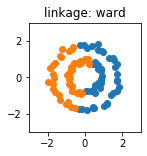

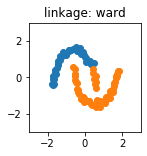

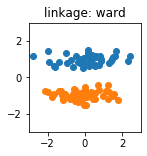

In [5]:
# create fct for looping 
def cluster_label(X1, link): 
    '''X1 is now any sample'''
    clustering = AgglomerativeClustering(n_clusters = 2, linkage=link).fit(X1)
    # extracting label that was was assigned to each datapoint
    labels = clustering.labels_
    # visualize 
    fig = plt.figure(figsize = (2,2))
    ax1 = fig.add_subplot()
    # call plt.scatter for each group --> better way to do this??
    for l in np.unique(labels):
        i_X = np.where(labels==l) # this gives index of zeros or 1s in lables array 
        ax1.scatter(X1[i_X,0], X1[i_X,1])
        ax1.set_xlim([-3, 3])
        ax1.set_ylim([-3, 3]) 
        ax1.set_title(f"linkage: {link}")
    plt.show()

# loop though all three samples 

for i, sample in enumerate(samples):
    cluster_label(sample, 'ward')

### linkages 
- This is not very successfull so the hyperparameters have to be changed
- I try looping trough the different linkages
- linkage single performs best when using default parameters. -> All datasets clustered correctly
- ward, average clusters the blobs correctly

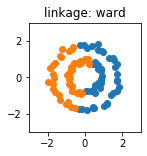

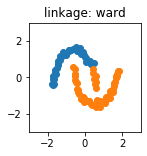

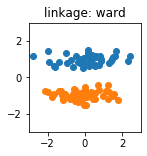

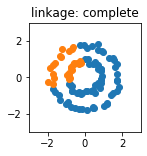

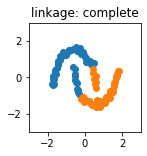

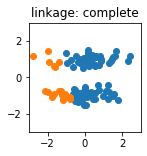

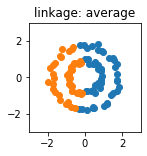

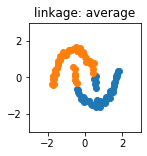

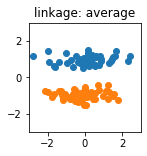

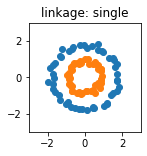

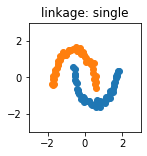

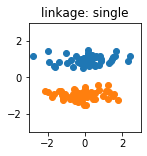

In [6]:
links = ['ward', 'complete', 'average', 'single']

for l in links:
    for i, sample in enumerate(samples):
        cluster_label(sample, l)


### Hyperparametertuning
- 'ward', 'complete', 'average' do not identify the clusters correctly 
- I will perform the hyperparameter by changing the metric

- For 'complete' the clustering can be achieved when not using the default metric euclidian, this is can be seen in the last couple graphs

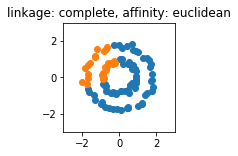

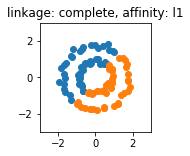

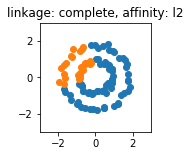

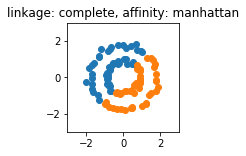

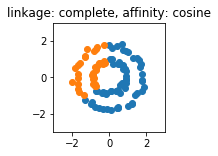

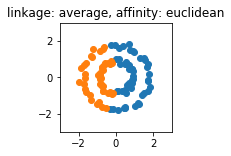

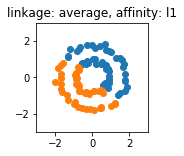

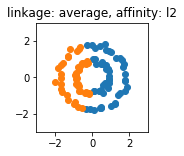

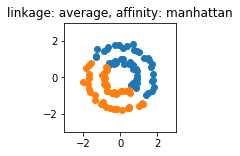

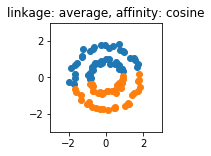

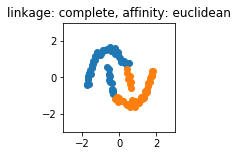

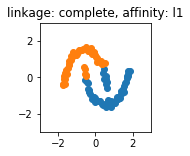

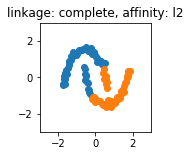

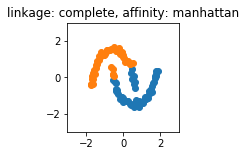

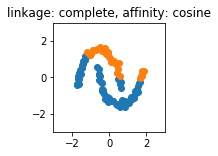

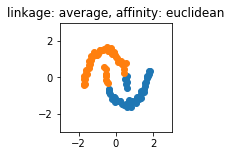

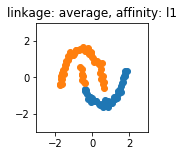

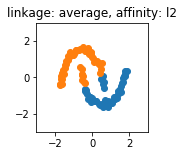

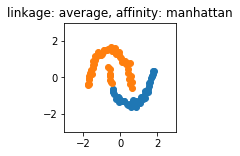

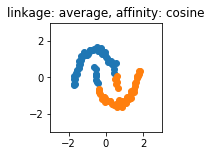

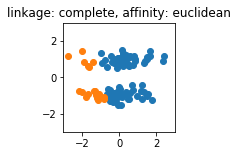

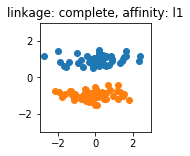

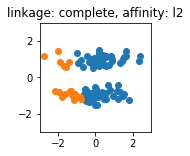

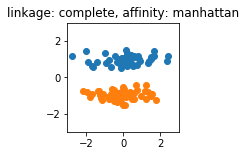

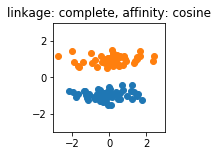

In [7]:
def cluster_label_params(X1, link, metric): 
    '''X1 is now any sample'''
    clustering = AgglomerativeClustering(n_clusters = 2, linkage=link, affinity=metric).fit(X1)
    # extracting label that was was assigned to each datapoint
    labels = clustering.labels_
    # visualize 
    fig = plt.figure(figsize = (2,2))
    ax1 = fig.add_subplot()
    # call plt.scatter for each group --> better way to do this??
    for l in np.unique(labels):
        i_X = np.where(labels==l) # this gives index of zeros or 1s in lables array 
        ax1.scatter(X1[i_X,0], X1[i_X,1])
        ax1.set_xlim([-3, 3])
        ax1.set_ylim([-3, 3]) 
        ax1.set_title(f"linkage: {link}, affinity: {metric}")
    plt.show()

links = ['ward', 'complete', 'average']
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

# start with varying metric
for m in metrics:
    cluster_label_params(X1, 'complete', m)
    
for m in metrics:
    cluster_label_params(X1, 'average', m)
    
for m in metrics:
    cluster_label_params(X2, 'complete', m)
    
for m in metrics:
    cluster_label_params(X2, 'average', m)

# all others cluster X3 correctly already
for m in metrics:
    cluster_label_params(X3, 'complete', m)


### Best models 
- linkage single: -> All datasets clustered correctly
- bolbs clustert correctly by all linkages

- average and complete perform poorley on the cicles

## Part 2: Compare these results with the performance of t-SNE and k-means
### Identify clusters with Kmeans

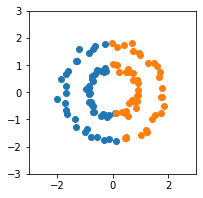

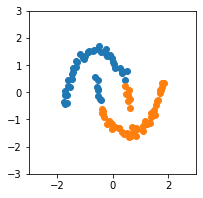

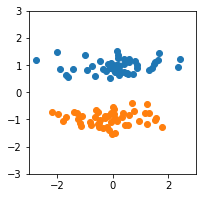

In [21]:
def my_cluster(X1):
    clustering = KMeans(n_clusters=2).fit(X1)

    # extracting label that was was assigned to each datapoint
    labels = clustering.labels_

    # visualize 
    fig = plt.figure(figsize = (3,3))
    ax1 = fig.add_subplot()

    # call plt.scatter for each group --> better way to do this??
    for l in np.unique(labels):
        i_X = np.where(labels==l) # this gives index of zeros or 1s in lables array 
        ax1.scatter(X1[i_X,0], X1[i_X,1])
        ax1.set_xlim([-3, 3])
        ax1.set_ylim([-3, 3])

    plt.show()
    
my_cluster(X1)
my_cluster(X2)
my_cluster(X3)